<a href="https://colab.research.google.com/github/IvashchenkoDR/Stat_prak/blob/main/Home_work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Задача 1


Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:



Напишем необходимую нам функцию:

In [2]:
def beauty_derivative_plot(point):

  plt.figure(1, figsize = (9, 5))

  x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
  y = 2 * np.sin(x) - np.cos(2 * x)
  dy = 2 * np.cos(x) + 2 * np.sin(2 * x)

  tg = 2 * np.cos(point) + 2 * np.sin(2 * point)
  value = 2 * np.sin(point) - np.cos(2 * point)
  arg = np.linspace(point - 1, point + 1)
  tangent = tg * (arg - point) + value

  plt.plot(x, y, 'b-', label = '$f(x) = 2sinx - cos2x$')
  plt.scatter(point, value, color = 'black')
  plt.plot(x, dy, 'r--', label = "$f'(x) = 2cosx + 2sin2x$")
  plt.plot(arg, tangent, 'g', label = f'tangent in x = {point}')
  plt.plot([point, point, 0], [0, value, value], color = 'purple', linestyle = '--')
  plt.legend()
  plt.title('Function, derivative and tangent line')

  plt.annotate(f"$f'({point}) = {tg:.2f}$", xy = (point, value), xytext = (point - 1, value - 2),
               arrowprops = dict(
                   arrowstyle = '->',
                   color = 'yellow',
                   linewidth = 1,
                   connectionstyle="arc3,rad=0.1",
               ),
               fontsize = 12,
               )
  plt.grid(True)
  plt.show()

Проверим полученные значения:

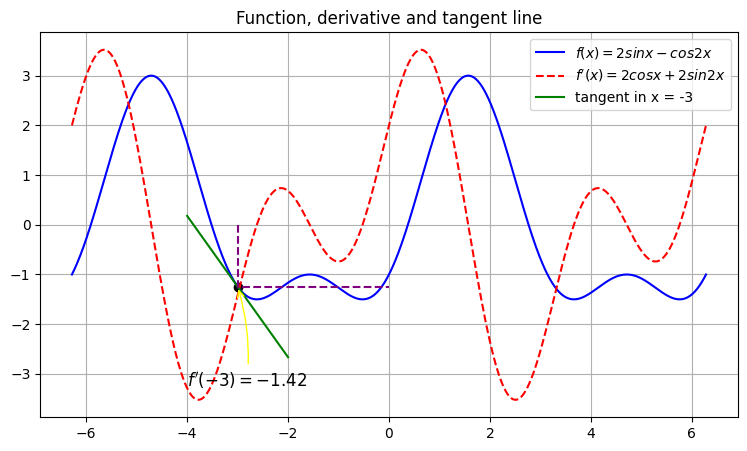

In [3]:
beauty_derivative_plot(-3)

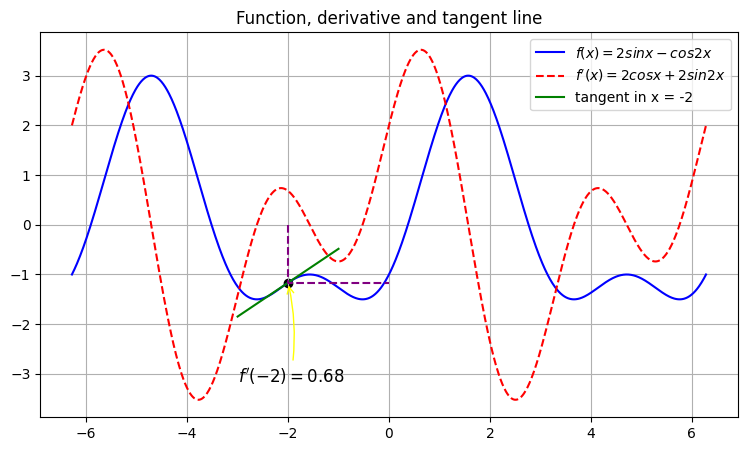

In [4]:
beauty_derivative_plot(-2)

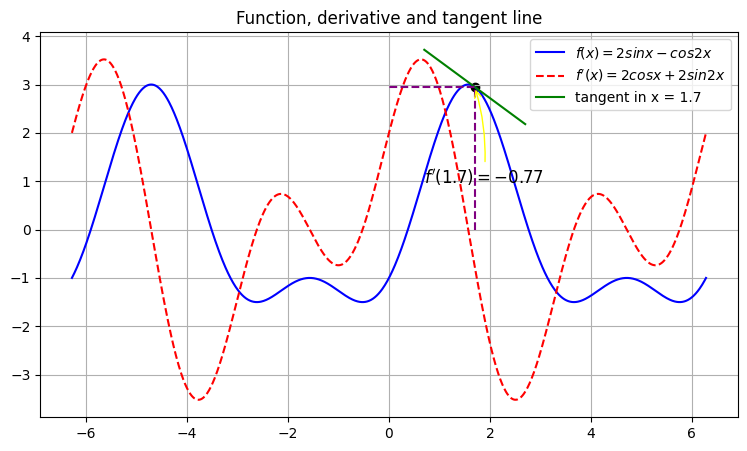

In [6]:
beauty_derivative_plot(1.7)

#Задача 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

In [66]:
data = np.loadtxt('/content/drive/MyDrive/populations.txt', skiprows = 1)
names = ['Hare', 'Lynx', 'Carrot']

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

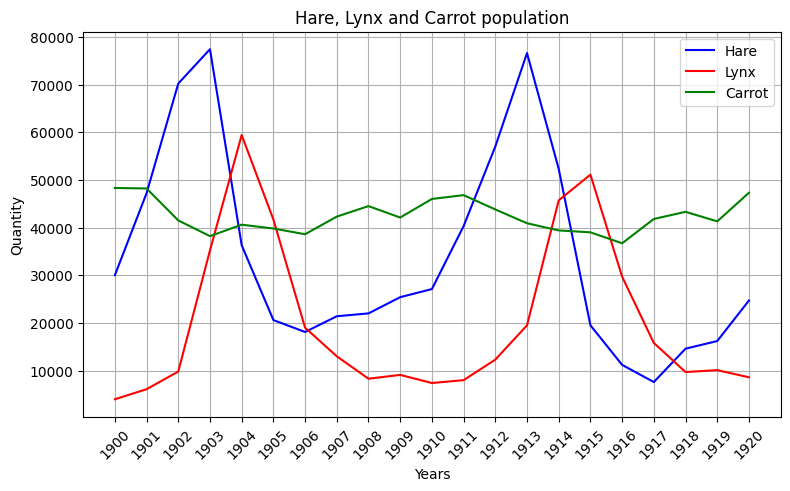

In [67]:
plt.figure(figsize = (9, 5))

plt.title('Hare, Lynx and Carrot population')
plt.plot(data[:, 0], data[:, 1], 'b', label = names[0])
plt.plot(data[:, 0], data[:, 2], 'r', label = names[1])
plt.plot(data[:, 0], data[:, 3], 'g', label = names[2])

plt.legend()
plt.grid(True)
plt.xticks(np.arange(1900, 1921, 1), rotation = 45)
plt.xlabel('Years')
plt.ylabel('Quantity')
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

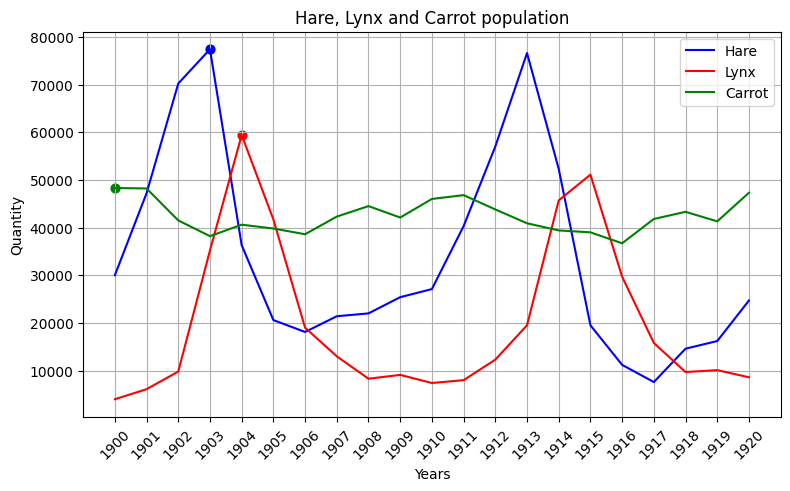

In [68]:
max_values = np.max(data, axis = 0)

mask1 = data[:, 1] == max_values[1]
mask2 = data[:, 2] == max_values[2]
mask3 = data[:, 3] == max_values[3]

plt.figure(figsize = (9, 5))

plt.title('Hare, Lynx and Carrot population')
plt.plot(data[:, 0], data[:, 1], 'b', label = names[0])
plt.plot(data[:, 0], data[:, 2], 'r', label = names[1])
plt.plot(data[:, 0], data[:, 3], 'g', label = names[2])

plt.scatter(data[:, 0][mask1], data[:, 1][mask1], s = 40, color = 'blue')
plt.scatter(data[:, 0][mask2], data[:, 2][mask2], s = 40, color = 'red')
plt.scatter(data[:, 0][mask3], data[:, 3][mask3], s = 40, color = 'green')

plt.legend()
plt.grid(True)

plt.xticks(np.arange(1900, 1921, 1), rotation = 45)

plt.xlabel('Years')
plt.ylabel('Quantity')
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

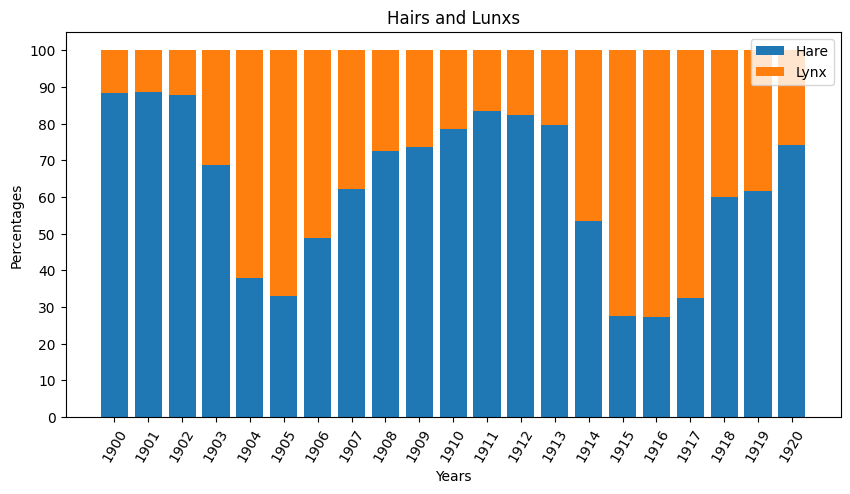

In [69]:
summ = data[:, 1] + data[:, 2]
ratio_hairs = 100 * data[:, 1] / summ

plt.figure(figsize = (10, 5))
plt.bar(data[:, 0], ratio_hairs, label = names[0])
plt.bar(data[:, 0], 100 - ratio_hairs, bottom = ratio_hairs, label = names[1])

plt.legend()
plt.title("Hairs and Lunxs")
plt.xlabel("Years")
plt.xticks(np.arange(1900, 1921, 1), rotation = 60)
plt.ylabel("Percentages")
plt.yticks(np.arange(0, 101, 10))

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

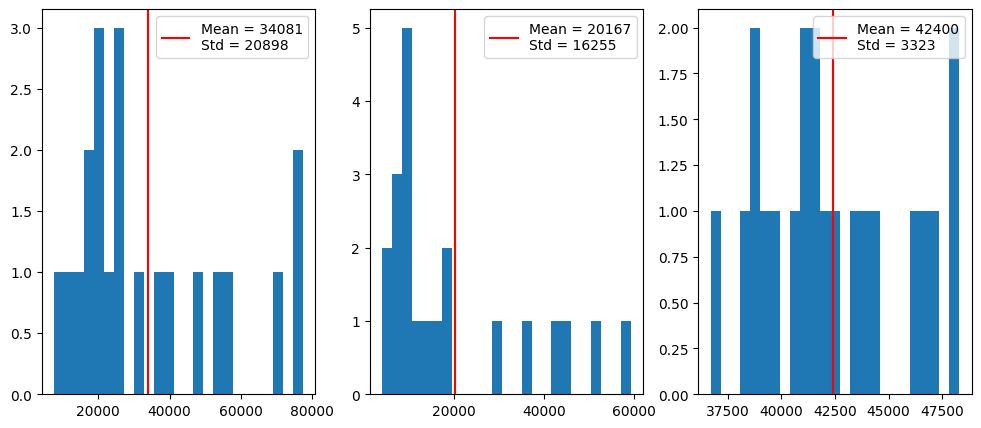

In [70]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

ax1.hist(data[:, 1], bins = 25)
ax1.axvline(x = mean[1], color = 'red', label = f'Mean = {mean[1]:.0f}\nStd = {std[1]:.0f}')
ax1.legend()

ax2.hist(data[:, 2], bins = 25)
ax2.axvline(x = mean[2], color = 'red', label = f'Mean = {mean[2]:.0f}\nStd = {std[2]:.0f}')
ax2.legend()

ax3.hist(data[:, 3], bins = 25)
ax3.axvline(x = mean[3], color = 'red', label = f'Mean = {mean[3]:.0f}\nStd = {std[3]:.0f}')
ax3.legend()

plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


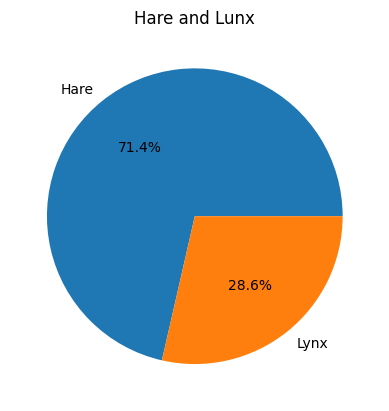

In [71]:
arr = np.where(data[:, 1] > data[:, 2], 'H', 'L')
print(arr)

plt.pie(
    [100 * np.count_nonzero(arr == 'H') / len(arr), 100 - 100 * np.count_nonzero(arr == 'H') / len(arr)],
    labels = names[:2],
    autopct = '%1.1f%%'
)
plt.title("Hare and Lunx")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

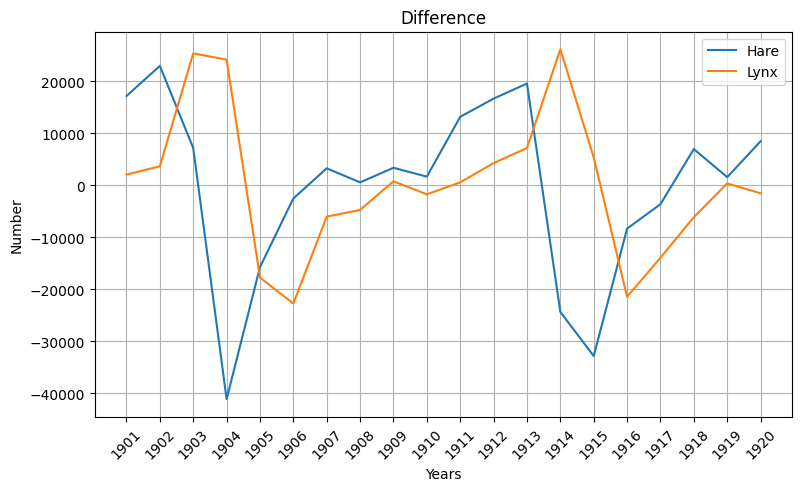

Коэффицент корреляции: -0.1780137


In [77]:
arr1 = np.diff(data[:, 1])
arr2 = np.diff(data[:, 2])

plt.figure(figsize = (9, 5))
plt.title('Difference')
plt.grid(True)

plt.plot(data[1:, 0], arr1, label = names[0])
plt.plot(data[1:, 0], arr2, label = names[1])

plt.legend()
plt.xticks(data[1:, 0], rotation = 45)
plt.xlabel('Years')
plt.ylabel('Number')

plt.show()
print(f'Коэффицент корреляции: {np.corrcoef(arr1, arr2)[0][1]:0.7f}')

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

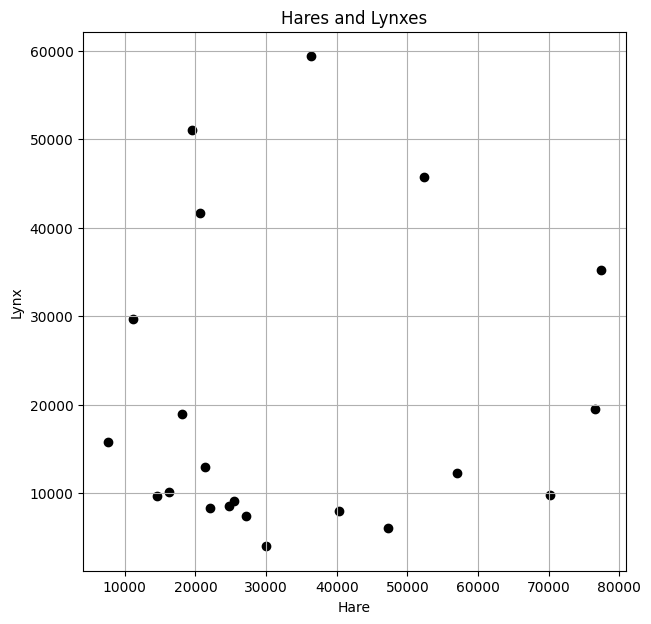

In [83]:
plt.figure(figsize = (7, 7))
plt.title('Hares and Lynxes')
plt.scatter(data[:, 1], data[:, 2], color = 'black')
plt.grid(True)

plt.xlabel(names[0])
plt.ylabel(names[1])

plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [90]:
mean = np.mean(data[:21, 1])
print('The Ratio is:', np.abs(mean - data[20, 1])/data[20, 1])

The Ratio is: 0.37979564295353774
